In [48]:
# pycharmでjupyter notebookを使う方法
# https://blog.jetbrains.com/ja/2019/11/30/2396/

import pandas as pd
import matplotlib.pyplot as plt
# ダークモードの場合、設定しないとメモリが見えなくなる
plt.style.use('dark_background')

import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf
from scipy.stats import poisson,binom
import math


In [49]:
# https://github.com/aviatesk/intro-statistical-modeling/edit/master/data/data6a.csv
df = pd.read_csv('../data/data6a.csv')
df.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


In [50]:
# N: 観察種子数
# y: 生存種子数
# x: 植物のサイズ
# f: C:肥料なし, T: 肥料あり(施肥[せひ]というらしい)

df.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [51]:
# カテゴリが何件入っているか見る
df["f"].value_counts()

C    50
T    50
Name: f, dtype: int64

In [52]:
# 型確認
df.dtypes

N      int64
y      int64
x    float64
f     object
dtype: object

<AxesSubplot:xlabel='x', ylabel='y'>

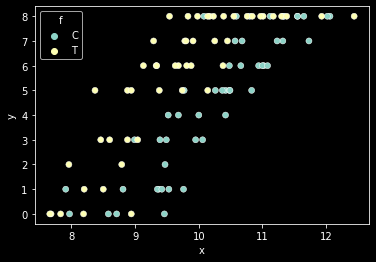

In [53]:

# 散布図
# https://engineeeer.com/pandas-dataframe-scatterplot/
sns.scatterplot(x='x', y='y', hue='f', data=df)

上の散布図をみると、
- 体サイズ$x_i$が大きくなると、生存種子数$y_i$が多くなるらしい
- 肥料を与えると生存種子数$y_i$が多くなるらしい

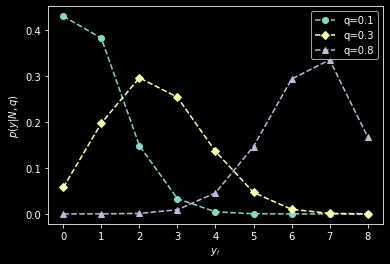

In [54]:
# 二項分布
# N個の中から$$y_i個とって、生存確率がqの割合？

y = np.arange(0, 9)
plt.plot(pd.Series(binom.pmf(y, 8, 0.1), index=y), 'o--', label='q=0.1')
plt.plot(pd.Series(binom.pmf(y, 8, 0.3), index=y), 'D--', label='q=0.3')
plt.plot(pd.Series(binom.pmf(y, 8, 0.8), index=y), '^--', label='q=0.8')
plt.legend(loc='upper right')
plt.xlabel('$y_{i}$')
plt.ylabel('$p (y | N, q)$')
plt.show()

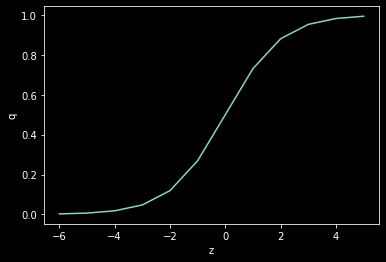

In [55]:
# ロジスティック曲線
z_list = np.arange(-6, 6)
q_list = list(map(lambda z: 1 / (1+math.exp(-z)), z_list))
plt.plot(z_list, q_list)
plt.xlabel('z')
plt.ylabel('q')
plt.show()

$z_i$は線型予測子$z_i=\beta_1+\beta_2 x_i + ...$

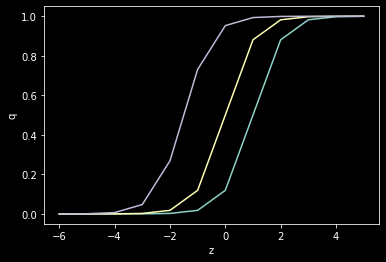

In [56]:
# beta2 = 2でbeta1が2, 0, -3の時
beta2 = 2
beta1_list = [2, 0, -3]
z_list = np.arange(-6, 6)
for beta1 in beta1_list:
    q_list = list(map(lambda z: 1 / (1+math.exp(beta1 -z * beta2)), z_list))
    # label='beta1={}'.format(beta1)みたいなの入れたけど、書かれなかった
    plt.plot(z_list, q_list)
plt.xlabel('z')
plt.ylabel('q')
plt.show()

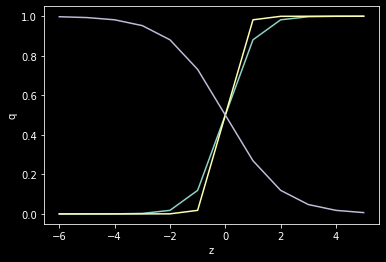

In [57]:
# beta1=0でbeta2が2,4,-1の時
beta1 = 0
beta2_list = [2,4,-1]
z_list = np.arange(-6, 6)
for beta2 in beta2_list:
    q_list = list(map(lambda z: 1 / (1+math.exp(beta1 -z * beta2)), z_list))
    # label='beta1={}'.format(beta1)みたいなの入れたけど、書かれなかった
    plt.plot(z_list, q_list)
plt.xlabel('z')
plt.ylabel('q')
plt.show()

生存確率$q_i$が体サイズ$x_i$にだけ依存していると仮定すると線型予測子は$z_i=\beta_1+\beta_2x_i$になる。
この時の$q_i$と$x_i$の関係がパラメータ$\beta_1,\beta_2$に依存している様子を上記グラフ達が示している。

ロジスティック関数の

$q_i=\frac{1}{1+exp(-z_i)}$

を変形すると

$log\frac{q_i}{1-q_i} = z_i$

となる。この左辺のことをロジット関数(logit function)という

$logit(q_i) = log \frac{q_i}{1-q_i}$

ロジット関数はロジスティック関数の逆関数であり、ロジスティック関数の逆関数がロジット関数。

## 6.4.2 パラメータ推定

当てはまりの良さを表す尤度関数

$L(\{\beta_j\})=\Pi_i\begin{pmatrix} N_i \\ y_i \end{pmatrix}q^{y_i}_i(1-q_i)^{N_i- y_i}$

から、対数尤度関数

$logL(\{\beta_j\})=\sum_i\{log \begin{pmatrix} N_i \\ y_i \end{pmatrix}+y_i log(q_i) + (N_i - y_i) log(1-q_i)\}$

が得られる(どうしてこれが出てくるのかはわからない。。。

上記logLを最大にする推定値のセット

$\{\hat{\beta}_j\}$

を探し出すのが最尤推定。
ここでの確率$q_i$は$\{\beta_1, \beta_2, \beta_3\}$の関数であることに注意

<AxesSubplot:xlabel='x', ylabel='y'>

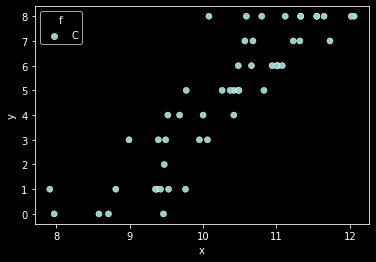

In [58]:
not_sehi_df = df[df['f'] == 'C']
sns.scatterplot(x='x', y='y', hue='f', data=not_sehi_df)

# 確率分布と線グラフの方は表示の方法分からないので割愛

In [59]:
import statsmodels.api as sm

# こういう書き方でできるらしい。general line modelが必要になったら調べるか・・・
fit = smf.glm(formula='y + I(N - y) ~ x + f', data=df, family=sm.families.Binomial())
res_fit = fit.fit()
# interceptが-19, x=1.9, fTが2.02
print(res_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Sat, 02 Jan 2021   Deviance:                       123.03
Time:                        15:05:59   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.0

$\{\hat{\beta_1},\hat{\beta_2},\hat{\beta_3}\}=\{-19.5, 1.95, 2.02\}$となった。

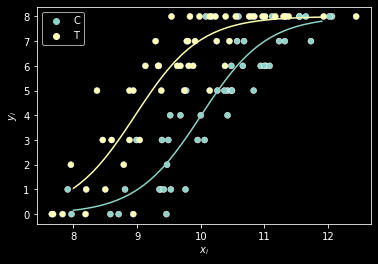

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x='x', y='y', hue='f', data=df)
eight_to_twelve = np.arange(8, 12, 0.1)
sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['T'] * len(eight_to_twelve)})
sehi_continuous_value_y = res_fit.predict(exog = sehi_continuous_value)
not_sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['C'] * len(eight_to_twelve)})
not_sehi_continuous_value_y = res_fit.predict(exog = not_sehi_continuous_value)
# 色の関係上plot実行順序を逆にしてみた
ax.plot(eight_to_twelve, not_sehi_continuous_value_y * 8)
ax.plot(eight_to_twelve, sehi_continuous_value_y * 8)
ax.set_xlabel('$x_{i}$')
ax.set_ylabel('$y_{i}$')
ax.legend(loc='upper left')
plt.show()

## 6.4.3 ロジットリンク関数の意味・解釈
ロジスティック関数の逆関数であるロジット関数は

$logit(q_i) = log \frac{q_i}{1-q_i}$

であり、これが線型予測子に等しいので

$log \frac{q_i}{1-q_i} = $ 線型予測子

$\frac{q_i}{1-q_i} = $ exp(線型予測子)

$\frac{q_i}{1-q_i} = exp(\beta_1 + \beta_2 x_i + \beta_3 f_i)$

$\frac{q_i}{1-q_i} = exp(\beta_1)*exp(\beta_2 x_i) * exp(\beta_3 f_i)$

となる。左辺の

$\frac{q_i}{1-q_i}$

はオッズ(odds)と呼ばれる量。(生存する確率) / (生存しない確率) という比率であり、
$q_i = 0.5$ の時は$\frac{0.5}{1-0.5}=1$なのでオッズは1倍,
$q_i = 0.8$ の時は$\frac{0.8}{1-0.8}=4$なのでオッズが4倍であると言ったりします。

`res_fit.summary()`にあった値から$\hat{\beta_1}$を省略し、$\{\hat{\beta_2},\hat{\beta_3}\}$を代入すると

$\frac{q_i}{1-q_i} \propto exp(1.95x_i)* exp(2.02 f_i)$

(∝は比例を表すから、比例を表すなら$\hat{\beta_1}$を省略した？

生存確率のオッズに対する植物個体の体サイズの影響を調べると、個体iの大きさが1単位増大した場合は

$\frac{q_i}{1-q_i} \propto exp(1.95 * (x_i + 1)) * exp(2.02 f_i)$

$\frac{q_i}{1-q_i} \propto exp(1.95 x_i) * exp(1.95) * exp(2.02 f_i)$

のように書ける。

In [61]:
print(math.exp(1.95))
print(math.exp(2.02))

7.028687580589293
7.538324933661922


7倍ぐらい増加する。同様に施肥処理あり($f_i$=1)だとexp(2.02)なので7.5倍増える。
このようにロジットリンク関数で生存確率を定義することによって、様々な要因と応答事象のオッズの解釈が簡単になる。

ロジスティック関数の利点は

- 生存確率が$0 \leq q_i \leq 1$となる
- 上記のように要因と応答事象のオッズの解釈ができる

オッズの対数を取ると

$log \frac{q_i}{1-q_i} = \beta_1 + \beta_2 x_i + \beta_3 f_i$

となる。右辺の$\beta_1 + \beta_2 x_i + \beta_3 f_i$は線型予測子$z_i$そのもの

「生活習慣Xによってなんとかビョウの発病リスクが7倍になります」などの「リスク」とはオッズ比のこと。

個人iの生活習慣Xの効果を表す係数が$\beta_s$deあるとして、発病確率を理事スティック回帰で調べたら$\hat{\beta_s} = 1.95$だったとする。
この場合

$\frac{Xのodds}{非Xのodds} = \frac{exp(X・非Xの共通部分) * exp(1.95 * 1)}{exp(X・非Xの共通部分) * exp(1.95 * 0)} = exp 1.95$

となる。よって病気になるオッズ比はexp1.95(=7倍)ぐらいと見積もれる

## 6.4.4 ロジスティック回帰のモデル選択

6.4.2項で作成したサイズ$x_i$と施肥処理$f_i$を説明変数に使ったロジスティック回帰の統計モデルが種子の生存数をもっともよく予測するモデルなのかは不明。

- 説明変数どちらか一方だけを使ったモデル
- どちらも使わないモデル

のほうが良い予測を得られるかもしれない。そこで、AICでモデル比較をする。

(ロジスティックだと0 or 1しか予測できないきがするので、現行のyでは予測できないのでは・・・？だからyを0-1の範囲にして線形で表現すべきなのか？)

In [62]:
# https://ohke.hateblo.jp/entry/2018/02/12/230000

# この記法が何を表しているのかが不明・・・

formulas = [
    'y + I(N - y) ~ 1',
    'y + I(N - y) ~ x',
    'y + I(N - y) ~ f',
    'y + I(N - y) ~ x + f'
]
results = []

for formula in formulas:
    results.append(smf.glm(formula=formula, data=df, family=sm.families.Binomial()).fit(disp=0))

# 比較するとx+fがよかったらしい
for i in range(4):
    print(formulas[i], ':', results[i].aic)



y + I(N - y) ~ 1 : 644.4093416623778
y + I(N - y) ~ x : 364.345443283716
y + I(N - y) ~ f : 637.7597534566678
y + I(N - y) ~ x + f : 272.2111292852233


## 6.5 交互作用項の入った線型予測子

線型予測子$\beta_1 + \beta_2 x_i + \beta_3 f_i$をさらに複雑化して交互作用(interaction)項を追加する。

この例題の交互作用とは植物の体サイズ$x_i$と施肥効果$f_i$の「積」の効果。

交互作用項を入れた線型予測子は$logit(q_i)=\beta_1 + \beta_2 x_i + \beta_3 f_i + \beta_4 x_i f_i$となる。

交互作用項$\beta_4 x_i f_i$は単純に「$x_i$と$f_i$の積に係数$\beta_4$を掛けた物」。交互作用が大きく影響を持つ場合、
平均生存種子数のサイズ$x_i$の依存性は施肥処理$f_i$によって大きく変わる


In [63]:
result = smf.glm(formula='y + I(N - y) ~ x + f + x:f', data=df, family=sm.families.Binomial()).fit()

print(result.summary())
print(result.aic)


                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Sat, 02 Jan 2021   Deviance:                       122.43
Time:                        15:06:00   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.0

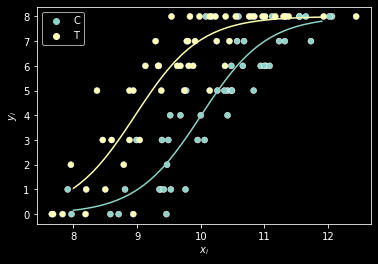

In [66]:
# 交差作用のないモデル
fit = smf.glm(formula='y + I(N - y) ~ x + f', data=df, family=sm.families.Binomial())
res_fit = fit.fit()
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x='x', y='y', hue='f', data=df)
eight_to_twelve = np.arange(8, 12, 0.1)
sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['T'] * len(eight_to_twelve)})
sehi_continuous_value_y = res_fit.predict(exog = sehi_continuous_value)
not_sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['C'] * len(eight_to_twelve)})
not_sehi_continuous_value_y = res_fit.predict(exog = not_sehi_continuous_value)
# 色の関係上plot実行順序を逆にしてみた
ax.plot(eight_to_twelve, not_sehi_continuous_value_y * 8)
ax.plot(eight_to_twelve, sehi_continuous_value_y * 8)
ax.set_xlabel('$x_{i}$')
ax.set_ylabel('$y_{i}$')
ax.legend(loc='upper left')
plt.show()



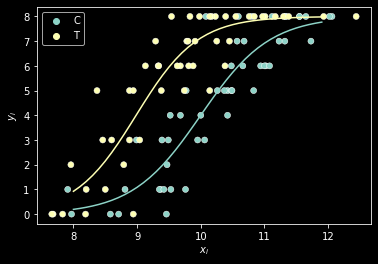

In [65]:
# 交差作用のあるモデル
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x='x', y='y', hue='f', data=df)
eight_to_twelve = np.arange(8, 12, 0.1)
sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['T'] * len(eight_to_twelve)})
sehi_continuous_value_y = result.predict(exog = sehi_continuous_value)
not_sehi_continuous_value = pd.DataFrame({'x': eight_to_twelve, 'f': ['C'] * len(eight_to_twelve)})
not_sehi_continuous_value_y = result.predict(exog = not_sehi_continuous_value)
# 色の関係上plot実行順序を逆にしてみた
ax.plot(eight_to_twelve, not_sehi_continuous_value_y * 8)
ax.plot(eight_to_twelve, sehi_continuous_value_y * 8)
ax.set_xlabel('$x_{i}$')
ax.set_ylabel('$y_{i}$')
ax.legend(loc='upper left')
plt.show()

上記を見ると、$f_i$(f[T.T])のcoef(係数)である$\beta_3$が-0.06ととても小さい。
また、aicはx+fよりほんの少し悪化している。

施肥処理をしなかった場合は

$logit(q_i) = -18.5 + 1.85x_i$

で、施肥処理をした場合は

$logit(q_i) = -18.5 - 0.06  + (1.85 + 0.216) * x_i = -18.6 + 2.07x_i$

となる。

交互作用項を追加しても上記グラフのようにほぼ変わらない。予測能力は何も改善されなかったと結論できる。
交互作用項を使うときに注意すべきは「無闇に交互作用項を入れない」ということ。説明変数が多い場合には交互作用項の個数が
組み合わせ論的爆発で増加してパラメータ推定が困難になる。

# 6.6 割り算値の統計モデリングはやめよう